In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
train = pd.read_csv('E:/DataScience_Study/Hackthons/Mahindra_Club/train_5CLrC8b/train.csv')
test = pd.read_csv('E:/DataScience_Study/Hackthons/Mahindra_Club/test_Jwt0MQH/test.csv')

In [3]:
df_train = train.copy()
df_test = test.copy()

In [4]:
pd.set_option('display.max_columns', 50)
df_train.head(8)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01/12/15,12/01/16,13/01/16,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20/01/16,20/01/16,21/01/16,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22/08/16,20/10/16,25/10/16,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172


In [ ]:
#checkin_date, checkout_date, 

In [ ]:
df_train.info()

In [ ]:
df_train.describe().T

In [4]:
target = df_train['amount_spent_per_room_night_scaled'] # target bvariable


In [5]:
# Drop target variable from training dataset
df_train = df_train.drop('amount_spent_per_room_night_scaled', axis=1)

In [6]:
 #assing an extra variable to training and testing dataset before joining them
df_train['training_set'] = True
df_test['training_set'] = False

df_full = pd.concat([df_train, df_test])
df_full.shape

(488189, 24)

In [ ]:
df_full.columns

In [ ]:
df_full.head(10)

In [8]:

#salesPrice corelation Matrix
k = 30 # no. of varibales for heatmap
cols = corrmat.nlargest(k, 'amount_spent_per_room_night_scaled')['amount_spent_per_room_night_scaled'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


NameError: name 'corrmat' is not defined

In [7]:
df_full.resort_region_code = df_full.resort_region_code.astype('object') 
df_full.resort_type_code = df_full.resort_type_code.astype('object') 
df_full.room_type_booked_code = df_full.room_type_booked_code.astype('object') 
df_full.season_holidayed_code = df_full.season_holidayed_code.astype('object')
df_full.main_product_code = df_full.main_product_code.astype('object')

In [8]:
df_full['no_guests'] = df_full.numberofadults + df_full.numberofchildren


In [9]:
df_full['booking_date'] = pd.to_datetime(df_full.booking_date)

In [ ]:
df_full.dtypes

In [10]:
df_full.drop(['reservation_id', 'persontravellingid', 'checkin_date', 'checkout_date', 'channel_code', 'state_code_residence', 'state_code_resort', 'total_pax', 'booking_type_code', 'reservationstatusid_code', 'resort_id', 'memberid'], axis=1, inplace=True)

In [11]:
df_full = df_full.set_index('booking_date')


In [12]:
df_full['booking_month'] = df_full.index.month
df_full['booking_month'] = df_full['booking_month'].astype('object')

In [ ]:
df_full.head(5)

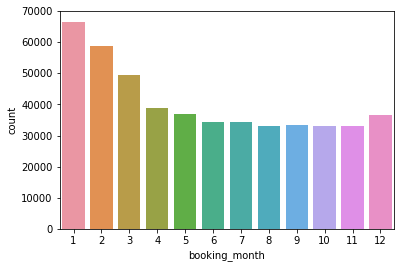

In [13]:
sns.countplot(df_full.booking_month)

In [15]:
df_full.columns.to_series().groupby(df_full.dtypes).groups # grouped by data types


{dtype('bool'): Index(['training_set'], dtype='object'),
 dtype('int64'): Index(['numberofadults', 'numberofchildren', 'roomnights', 'no_guests'], dtype='object'),
 dtype('O'): Index(['main_product_code', 'resort_region_code', 'resort_type_code',
        'room_type_booked_code', 'season_holidayed_code', 'member_age_buckets',
        'cluster_code', 'booking_month'],
       dtype='object')}

In [14]:
# We analyse target varibale : amount_spent_per_room_night_scaled 

print("There are {} NA values in 'amount_spent_per_room_night_scaled' ".format(target.isnull().sum()))

There are 0 NA values in 'amount_spent_per_room_night_scaled' 


C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: -0.923229


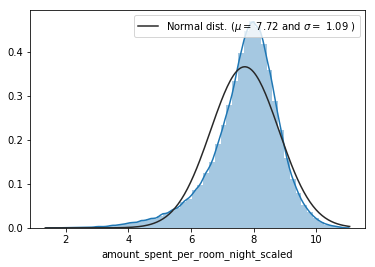

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.distplot(target, fit=norm)
mu, sigma = norm.fit(target) # for grtting mean and Std, deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
print("Skewness: %f" % target.skew()) 

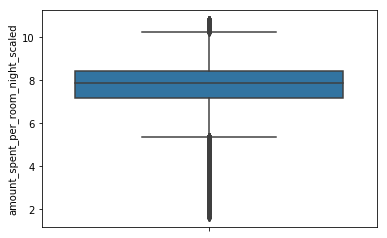

In [17]:
sns.boxplot(y = target)

In [16]:
total = df_full.isnull().sum().sort_values(ascending = False)


In [17]:
perc = (df_full.isnull().sum()/df_full.isnull().count()*100).sort_values(ascending = False)


In [18]:
missing_data = pd.concat([total, perc], axis=1, keys=('Total', 'percent'))
missing_data.head(5)

,Total,percent
season_holidayed_code,149,0.030521
booking_month,0,0.000000
no_guests,0,0.000000
training_set,0,0.000000
cluster_code,0,0.000000


In [19]:
for column in ['season_holidayed_code']:
    df_full[column].fillna(df_full[column].mode()[0], inplace=True)
    
df_full.isna().sum().sort_values(ascending=False)

booking_month            0
no_guests                0
training_set             0
cluster_code             0
member_age_buckets       0
season_holidayed_code    0
roomnights               0
room_type_booked_code    0
resort_type_code         0
resort_region_code       0
numberofchildren         0
numberofadults           0
main_product_code        0
dtype: int64

In [20]:
#df_full[(df_full['numberofadults'] == 0) & (df_full['numberofchildren'] == 0)]
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
numberofadults,488189.0,3.275522,1.764458,0.0,2.0,3.0,4.0,32.0
numberofchildren,488189.0,0.362573,0.758078,0.0,0.0,0.0,0.0,13.0
roomnights,488189.0,3.735949,2.480057,-45.0,2.0,3.0,4.0,80.0
season_holidayed_code,488189.0,2.675828,0.884613,1.0,2.0,3.0,3.0,4.0
no_guests,488189.0,3.638095,1.888372,0.0,2.0,3.0,4.0,34.0


In [21]:
len(df_full[df_full['no_guests'] == 0])

40

In [22]:
df_full[(df_full['numberofadults'] == 0) & (df_full['numberofchildren'] > 0)]

,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,member_age_buckets,cluster_code,training_set,no_guests,booking_month
booking_date,,,,,,,,,,,,,


In [23]:
df_full.roomnights.replace(to_replace= -45, value=45, inplace=True)

In [24]:
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
numberofadults,488189.0,3.275522,1.764458,0.0,2.0,3.0,4.0,32.0
numberofchildren,488189.0,0.362573,0.758078,0.0,0.0,0.0,0.0,13.0
roomnights,488189.0,3.736133,2.479779,0.0,2.0,3.0,4.0,80.0
season_holidayed_code,488189.0,2.675828,0.884613,1.0,2.0,3.0,3.0,4.0
no_guests,488189.0,3.638095,1.888372,0.0,2.0,3.0,4.0,34.0


In [25]:
df_full.shape

(488189, 13)

In [ ]:
#train[(train['numberofadults'] == 0) & (train['numberofchildren'] == 0)
#test[(test['numberofadults'] == 0) & (test['numberofchildren'] == 0)


In [26]:
df_full = pd.get_dummies(df_full, sparse=True)
df_full.shape

(488189, 55)

In [27]:
# separate my joined dataframe into training and testing dataframe
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)

df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

(df_train.shape, df_test.shape)


((341424, 54), (146765, 54))

In [35]:
from sklearn.model_selection import train_test_split

X = df_train
y = target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1234)

C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def predict_metrics(model, x, y):
    pred = model.predict(x)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    return mse, mae, r2

In [37]:
# Linear Regression

# Higher dimensions.
from sklearn.linear_model import LinearRegression

linR = LinearRegression(normalize=True).fit(X_train, y_train)
multi_intercept = linR.intercept_
multi_coeffs = dict(zip(X, linR.coef_))

print("Intercept: ", multi_intercept)
#print("coefficients: ", multi_coeffs)

Intercept:  -216914721760.50873


In [43]:
# calculate error matrix:
mse_train, mae_train, r2_train = predict_metrics(linR, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train", r2_train)

mse_valid, mae_valid, r2_valid = predict_metrics(linR, X_valid, y_valid)
print("Validation mse:", mse_valid," Validation mae:", mae_valid," R2-validation", r2_valid)

y_pred_valid = linR.predict(X_valid)


train mse: 1.1204441663121494  train mae: 0.7828631086300311  R2-train 0.05525094364038574
Validation mse: 1.1277331628455887  Validation mae: 0.7849107421948045  R2-validation 0.05848758483018168


C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Actual Value')

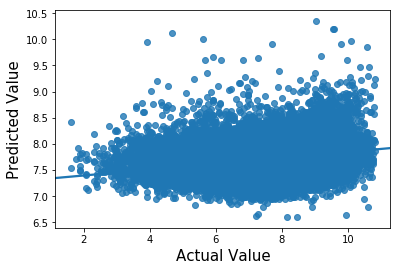

In [44]:
y_true= y_valid
y_pred= y_pred_valid

sns.regplot(y_true, y_pred, scatter=True)
plt.ylabel('Predicted Value', fontsize=15)
plt.xlabel('Actual Value', fontsize=15)

C:\Users\ikd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Residual Error')

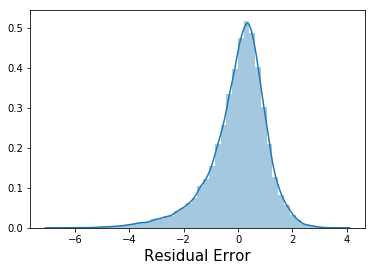

In [45]:
sns.distplot((y_true)-(y_pred))
plt.xlabel('Residual Error', fontsize=15)

In [46]:
validation_rmse = np.sqrt(mse_valid) * 100
validation_rmse

106.19478155001727

In [47]:
y_pred_linR = linR.predict(df_test)
y_pred_linR

array([7.50698853, 7.77584839, 7.5211792 , ..., 7.9256897 , 7.41412354,
       7.51190186])

# Polynomial

In [48]:
from sklearn.preprocessing import PolynomialFeatures

X = df_train
y = target


poly = PolynomialFeatures(degree=2)
xpoly = poly.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(xpoly, y, test_size=0.2,random_state=32)


model = LinearRegression().fit(X_train, y_train)
predy = model.predict(X_test)
#predx = model.predict(X_train)

#train_rmse= np.sqrt(mean_squared_error(y_train,predx))
#train_r2 = model.score(X_train, y_train)

test_rmse= np.sqrt(mean_squared_error(y_test,predy))
test_r2 = model.score(X_test, y_test)

perc = ((train_rmse-test_rmse)/train_rmse)*100

Train_adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
Test_adjusted_r2= 1 - ((1 - test_r2)*((X_test.shape[0] - 1)/(X_test.shape[0]-(X_test.shape[1]+1))))

print(f'Train (R-Squared): {train_r2:0.4f}; || Train Adj_R-Squared: {Train_adjusted_r2:0.4f}')
print(f'Test  (R-Squared): {test_r2:0.4f}; || Test Adj_R-Squared:  {Test_adjusted_r2:0.4f}')

print("Test RMSE:", test_rmse*100)


Train (R-Squared): 0.0760; || Train Adj_R-Squared: 0.0708
Test  (R-Squared): 0.0638; || Test Adj_R-Squared:  0.0422
Test RMSE: 105.7616110352838


In [50]:
df_test_poly = poly.fit_transform(df_test)
y_pred_poly = model.predict(df_test_poly)
y_pred_poly

my_submission = pd.DataFrame({'reservation_id': test.reservation_id, 'amount_spent_per_room_night_scaled':y_pred_poly})

my_submission.to_csv('E:/DataScience_Study/Hackthons/Mahindra_Club/submission2-ak.csv', index=False)

# XGBoost Regressor

In [83]:

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

X = df_train
y = target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1234)


xgb = XGBRegressor(objective ='reg:linear',learning_rate = 0.7, max_depth = 8, alpha = 10,
                  n_estimators = 10, min_child_weight=1, gamma=10, subsample=0.8, colsample_bytree=0.8,scale_pos_weight=1, seed=27)

xgb.fit(X_train,y_train)

#y_pred = xgb.predict(X_test)

C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\ikd\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=10, importance_type='gain',
       learning_rate=0.7, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [84]:
# calculate error matrix:
mse_train, mae_train, r2_train = predict_metrics(xgb, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train", r2_train)

mse_valid, mae_valid, r2_valid = predict_metrics(xgb, X_valid, y_valid)
print("Validation mse:", mse_valid," Validation mae:", mae_valid," R2-validation", r2_valid)

#y_pred_valid = xgb.predict(X_valid)

train mse: 1.0762105433703373  train mae: 0.7668351824829762  R2-train 0.09254836085233942
Validation mse: 1.106330894603358  Validation mae: 0.7757973886972515  R2-validation 0.07635573123815775


In [85]:
validation_rmse = np.sqrt(mse_valid) * 100
validation_rmse

105.18226535891677

In [86]:
y_pred = xgb.predict(df_test)

my_submission = pd.DataFrame({'reservation_id': test.reservation_id, 'amount_spent_per_room_night_scaled':y_pred})

my_submission.to_csv('E:/DataScience_Study/Hackthons/Mahindra_Club/submission5-ak.csv', index=False)